**Mounting google drive in this collab notebook**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Now we are importing libraries**

In [2]:
import numpy as np
import cv2
import os

# Pre processing 

*   **loading test data set from drive ** 
*   **converting the image data in numpy array **




In [3]:
X = []
y = []

for img_name in os.listdir("./gdrive/MyDrive/A_A_N/yawn"):
    img = cv2.imread(f"./gdrive/MyDrive/A_A_N/yawn/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(1)

for img_name in os.listdir("./gdrive/MyDrive/A_A_N/no_yawn"):
    img = cv2.imread(f"./gdrive/MyDrive/A_A_N/no_yawn/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(0)

In [4]:
X[0].shape

(100, 100)

In [5]:
print(len(X), len(y))

1448 1448


In [6]:
X = np.array(X)
y = np.array(y)
X = X.reshape((-1, 100, 100, 1))

In [7]:
print(X.shape, y.shape)

(1448, 100, 100, 1) (1448,)


**Splitting the dataset into training and testing dataset**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1158, 100, 100, 1) (1158,) (290, 100, 100, 1) (290,)


In [10]:
import tensorflow as tf
from tensorflow import keras

**Creating Convolutional Neural Network**

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(100, (3, 3), activation="relu", input_shape=(100, 100, 1)),
    keras.layers.Conv2D(150, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(100, (3, 3), activation="relu"),
    keras.layers.Conv2D(150, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 100)       1000      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       135150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 100)       135100    
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 150)       135150    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 150)      0         
 2D)                                                    

In [13]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [14]:
hist = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
37/37 [==============================] - 315s 8s/step - loss: 0.6586 - accuracy: 0.5907
Epoch 2/10
37/37 [==============================] - 310s 8s/step - loss: 0.5790 - accuracy: 0.6675
Epoch 3/10
37/37 [==============================] - 306s 8s/step - loss: 0.5444 - accuracy: 0.6857
Epoch 4/10
37/37 [==============================] - 304s 8s/step - loss: 0.4782 - accuracy: 0.7651
Epoch 5/10
37/37 [==============================] - 305s 8s/step - loss: 0.3876 - accuracy: 0.8195
Epoch 6/10
37/37 [==============================] - 307s 8s/step - loss: 0.2849 - accuracy: 0.8851
Epoch 7/10
37/37 [==============================] - 302s 8s/step - loss: 0.1465 - accuracy: 0.9473
Epoch 8/10
37/37 [==============================] - 304s 8s/step - loss: 0.1331 - accuracy: 0.9516
Epoch 9/10
37/37 [==============================] - 303s 8s/step - loss: 0.0734 - accuracy: 0.9750
Epoch 10/10
37/37 [==============================] - 306s 8s/step - loss: 0.0325 - accuracy: 0.9888


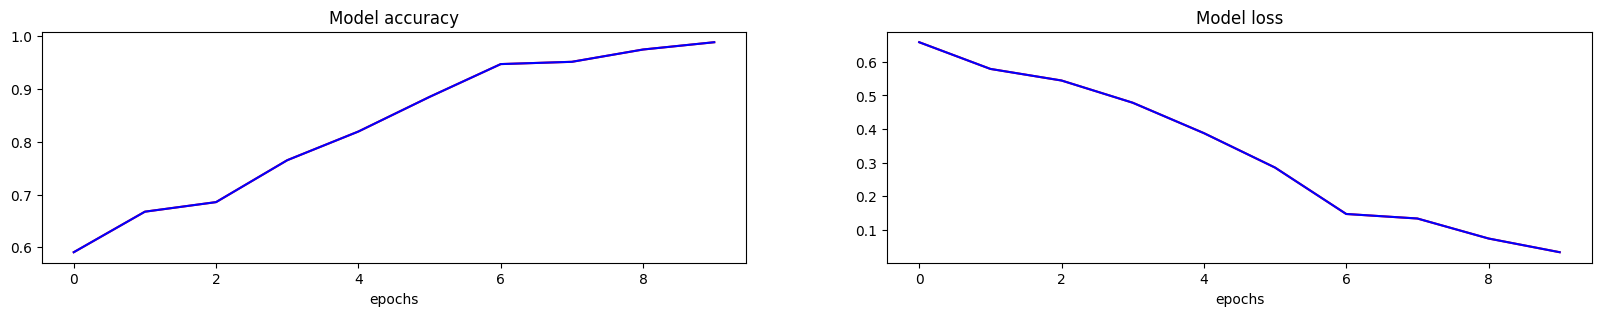

In [15]:
import matplotlib.pyplot as plt

ig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(model.history.history[metric],'r')
    # ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    # ax[i].set_ylabel(metric)
    # ax[i].legend(["train", "val"])

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(model.history.history[metric],'b')
    # ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    # ax[i].set_ylabel(metric)
    # ax[i].legend(["train", "val"])

In [16]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 21s 2s/step - loss: 0.2411 - accuracy: 0.9276


[0.2411048859357834, 0.9275861978530884]

In [17]:
# model.save("./yawn_model.h5")

In [18]:
from keras.models import load_model
model.save('./gdrive/MyDrive/data_augmented/yawn_new.h5')